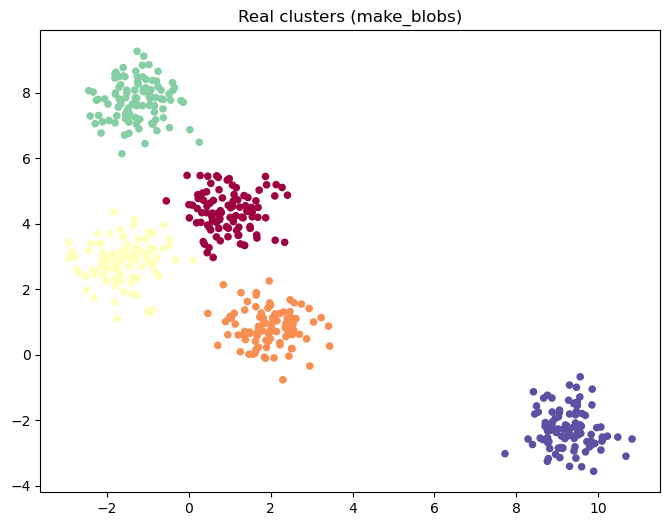

In [17]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
#Creating clusters
X, y = make_blobs(n_samples=500, n_features=2, centers=5, 
                  cluster_std=0.6, random_state=0)

colors = np.array([plt.cm.Spectral(val)
                   for val in np.linspace(0, 1, len(set(y)))])

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=20)
plt.title("Real clusters (make_blobs)")
plt.show()

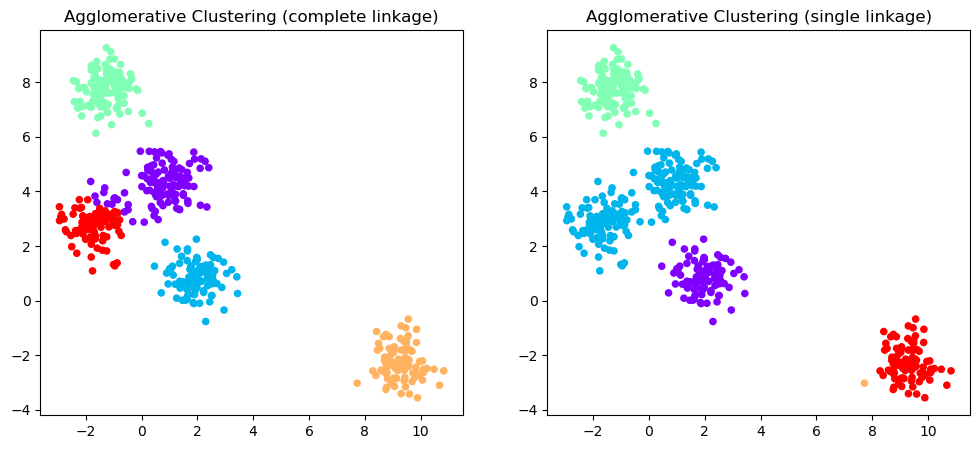

In [18]:
#Clustering by Complete and single linkage
from sklearn.cluster import AgglomerativeClustering

# Complete linkage
agg_complete = AgglomerativeClustering(n_clusters=5, linkage='complete')
labels_complete = agg_complete.fit_predict(X)

# Single linkage
agg_single = AgglomerativeClustering(n_clusters=5, linkage='single')
labels_single = agg_single.fit_predict(X)

# Visualisation
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X[:,0], X[:,1], c=labels_complete, cmap='rainbow', s=20)
ax[0].set_title("Agglomerative Clustering (complete linkage)")
ax[1].scatter(X[:,0], X[:,1], c=labels_single, cmap='rainbow', s=20)
ax[1].set_title("Agglomerative Clustering (single linkage)")
plt.show()

In [19]:
#Complete linkage counted right amount of clusters, but made some mistakes with red and purple clusters, when single linkage method united them.

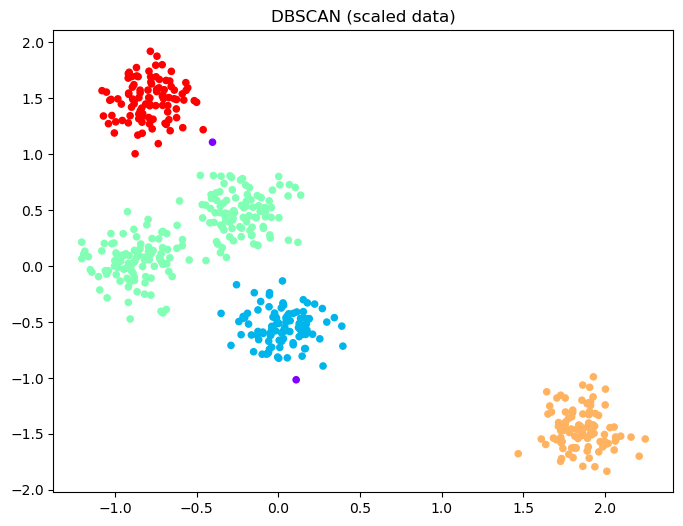

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_dbscan, cmap='rainbow', s=20)
plt.title("DBSCAN (scaled data)")
plt.show()

In [21]:
#This method found right amount of clusters, but placed them wrong.

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

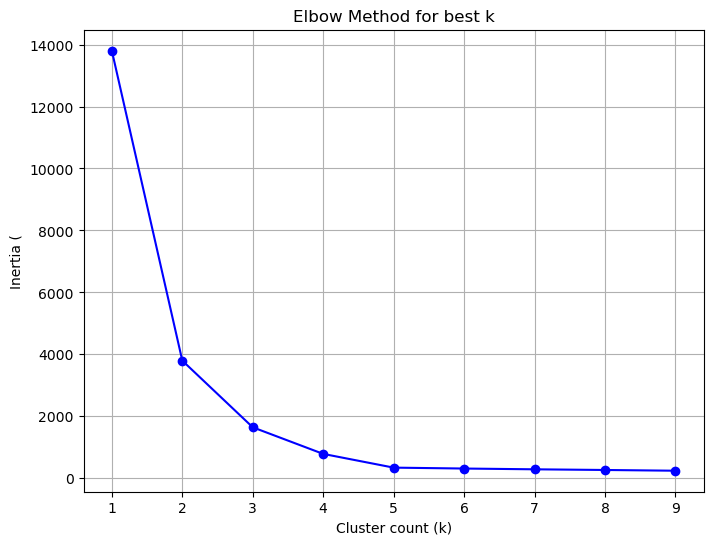

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Looking for best k
inertias = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8,6))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Cluster count (k)')
plt.ylabel('Inertia (')
plt.title('Elbow Method for best k')
plt.grid(True)
plt.show()

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


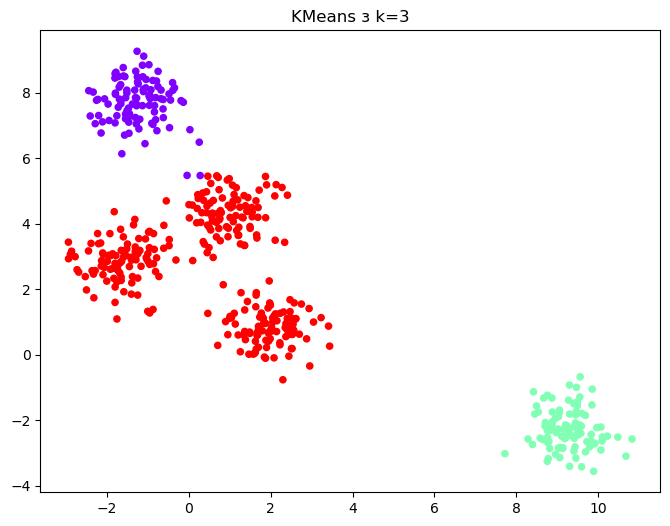

In [23]:
best_k = 3  #Elbow method shows best amount of clusters: 3
kmeans_final = KMeans(n_clusters=best_k, random_state=0)
labels_kmeans = kmeans_final.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels_kmeans, cmap='rainbow', s=20)
plt.title(f"KMeans з k={best_k}")
plt.show()

In [24]:
#Summing up, the best result were shown using  complete linkage. DBSCAN found right amount of clusters, but placed them bad.